Carregando Energy Efficiency Dataset...
Dataset Energy Efficiency carregado com sucesso!

Carregando California Housing Dataset...
Dataset California Housing carregado com sucesso!

Iniciando experimento com Energy Efficiency Dataset...

Formato dos dados de treino e teste (Energy Efficiency):
X_train_en shape: (537, 8)
y_train_en shape: (537,)
X_test_en shape: (231, 8)
y_test_en shape: (231,)


Resultados (RMSE e MAE) para Energy Efficiency:
Linear Regression: RMSE = 2.9731 ± 0.0000 | MAE = 2.1551 ± 0.0000
Ridge Regression: RMSE = 2.9786 ± 0.0000 | MAE = 2.1529 ± 0.0000
Random Forest: RMSE = 0.4894 ± 0.0035 | MAE = 0.3379 ± 0.0031
SVR: RMSE = 2.8285 ± 0.0000 | MAE = 1.9373 ± 0.0000
MLP Regressor: RMSE = 1.6279 ± 0.2649 | MAE = 1.1387 ± 0.1655
KNN Regressor: RMSE = 2.4309 ± 0.0000 | MAE = 1.6060 ± 0.0000


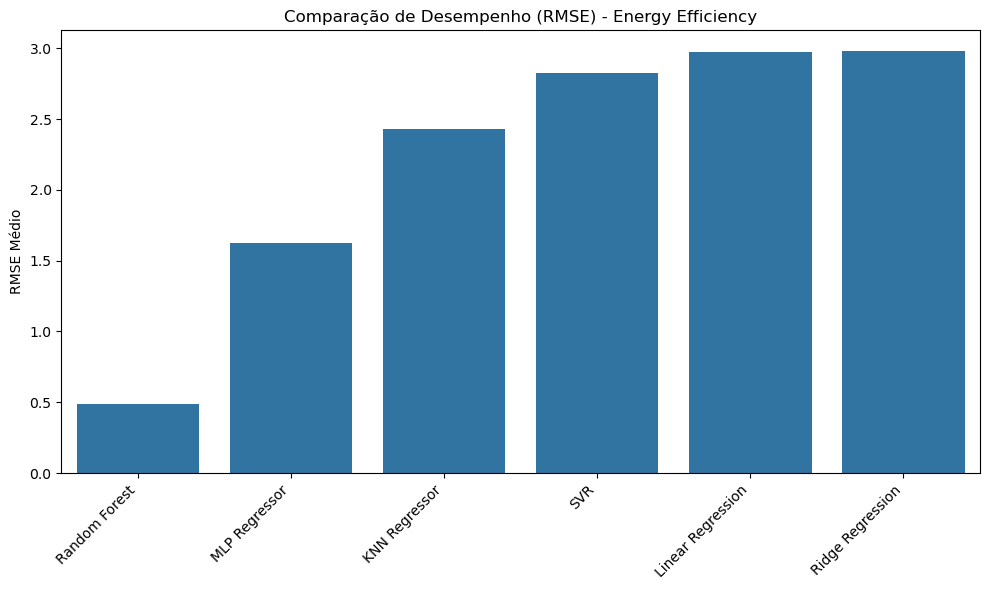


Gráfico 'energy_efficiency_rmse_comparison.png' gerado.


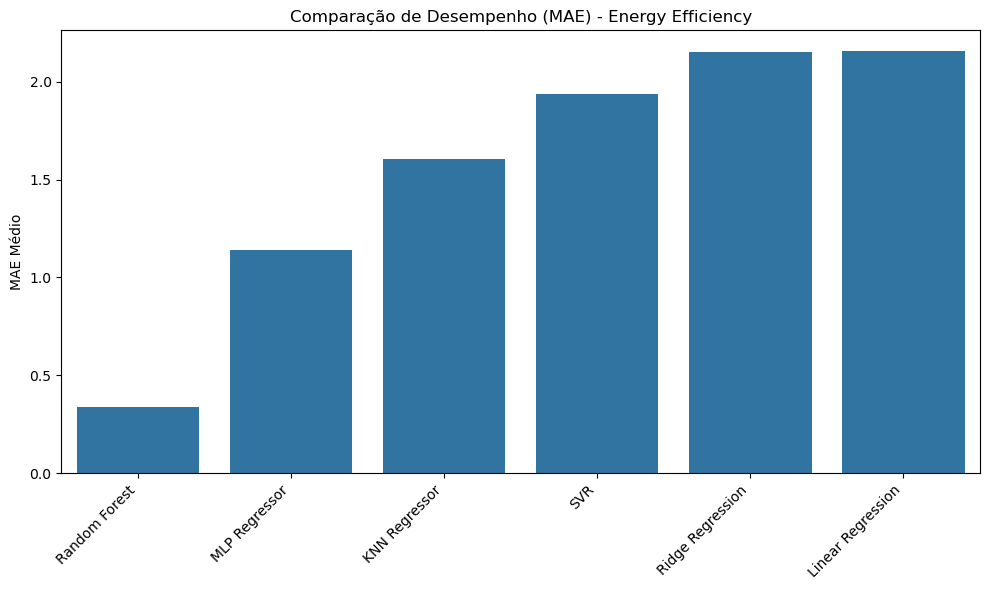

Gráfico 'energy_efficiency_mae_comparison.png' gerado.


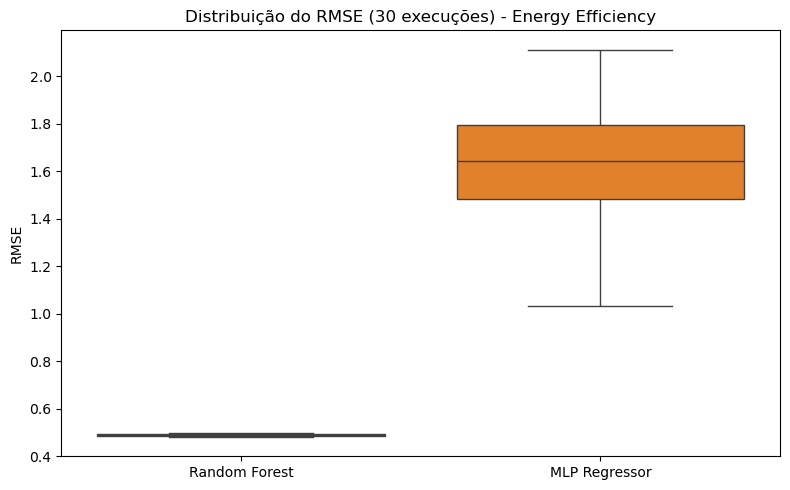

Gráfico 'energy_efficiency_rmse_distribution.png' gerado.


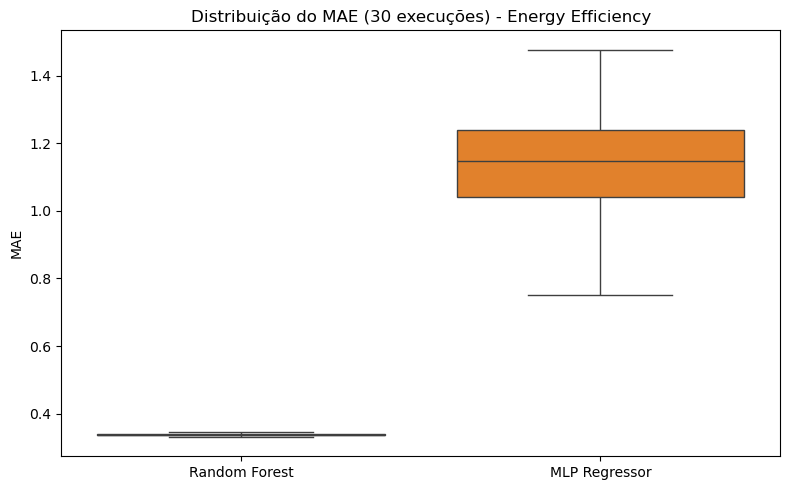

Gráfico 'energy_efficiency_mae_distribution.png' gerado.


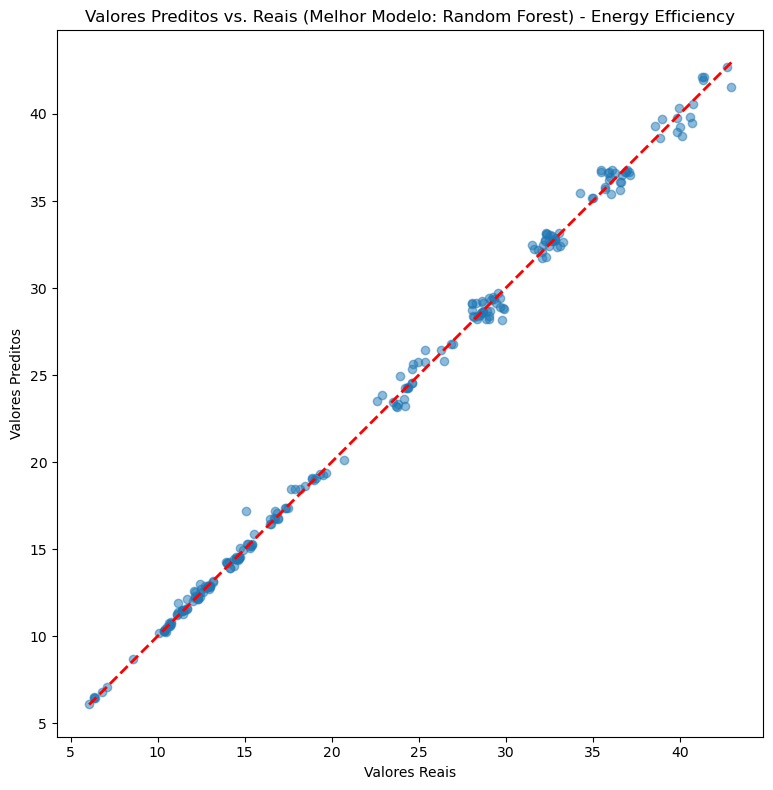

Gráfico 'energy_efficiency_predicted_vs_actual.png' gerado para o melhor modelo: Random Forest.


Iniciando experimento com California Housing Dataset...

Resultados (RMSE e MAE) para California Housing:
Linear Regression: RMSE = 0.7284 ± 0.0000 | MAE = 0.5272 ± 0.0000
Ridge Regression: RMSE = 0.7284 ± 0.0000 | MAE = 0.5272 ± 0.0000
Random Forest: RMSE = 0.5050 ± 0.0014 | MAE = 0.3315 ± 0.0011
SVR: RMSE = 0.5891 ± 0.0000 | MAE = 0.3963 ± 0.0000
MLP Regressor: RMSE = 0.5152 ± 0.0056 | MAE = 0.3507 ± 0.0080
KNN Regressor: RMSE = 0.6507 ± 0.0000 | MAE = 0.4431 ± 0.0000


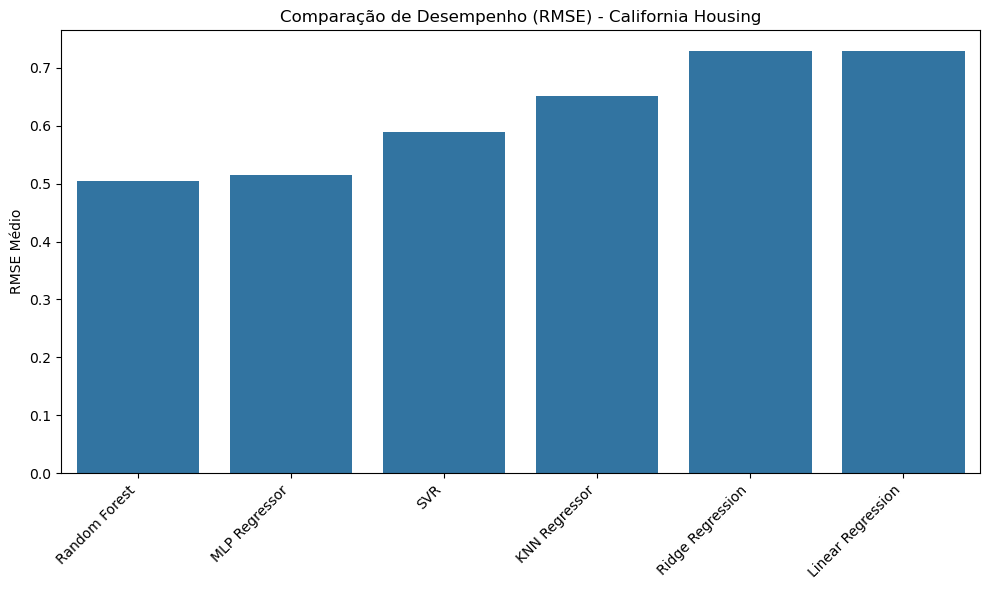


Gráfico 'housing_rmse_comparison.png' gerado.


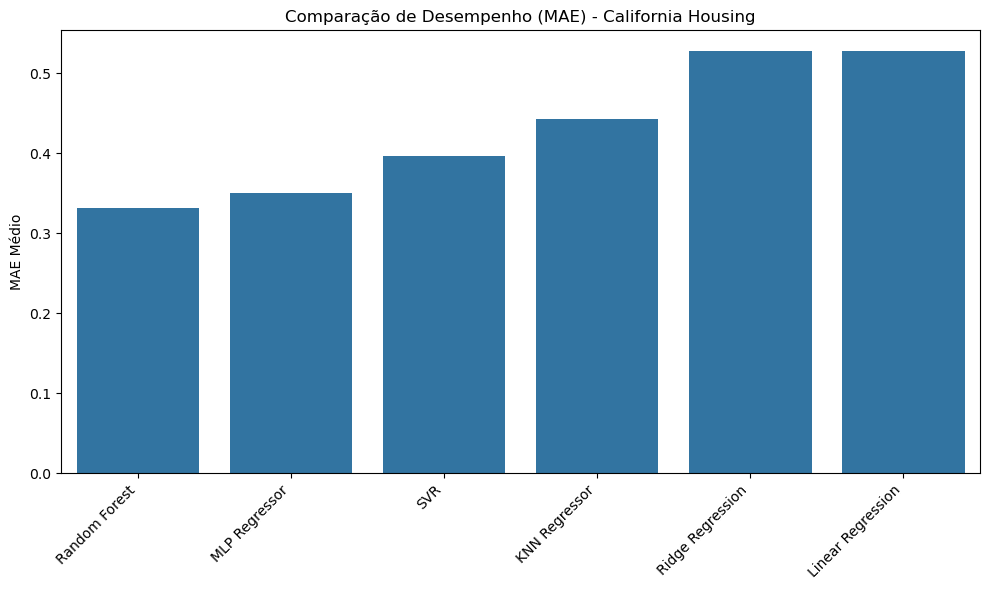

Gráfico 'housing_mae_comparison.png' gerado.


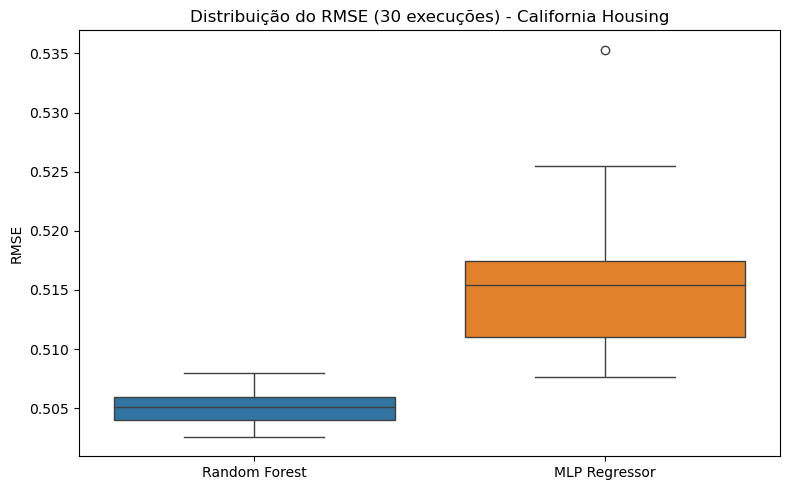

Gráfico 'housing_rmse_distribution.png' gerado.


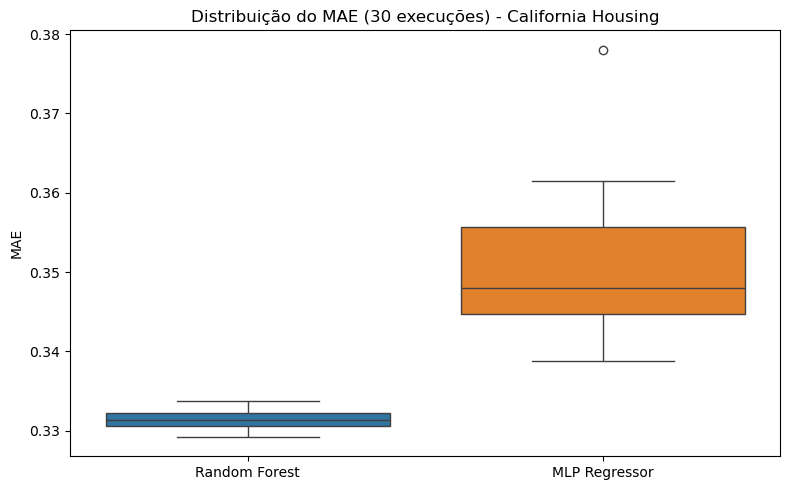

Gráfico 'housing_mae_distribution.png' gerado.


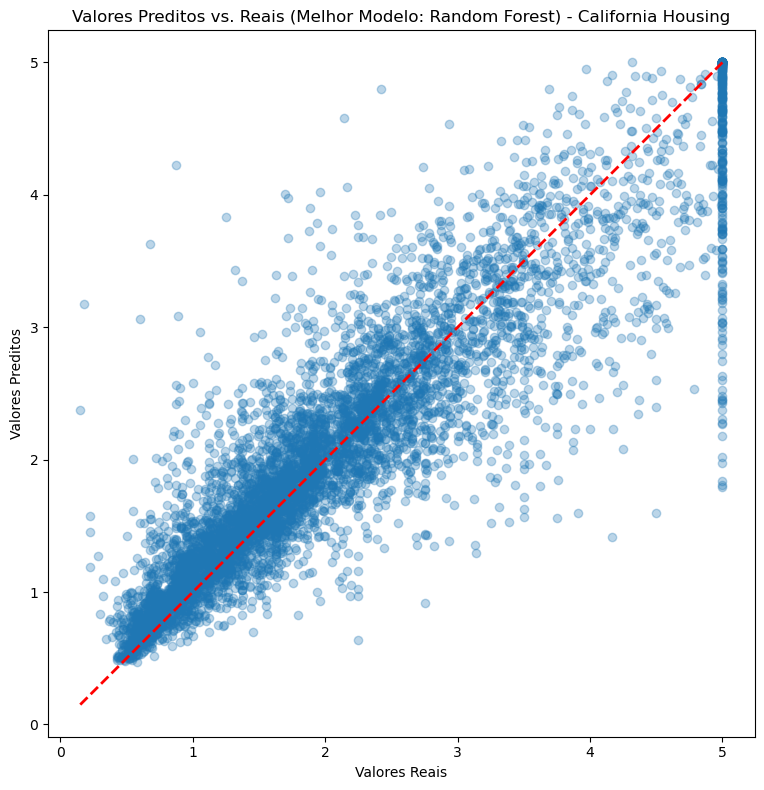

Gráfico 'housing_predicted_vs_actual.png' gerado para o melhor modelo: Random Forest.

=== RESUMO FINAL ===

Melhor modelo para Energy Efficiency (RMSE): Random Forest
Melhor modelo para California Housing (RMSE): Random Forest


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Carregamento dos Datasets ---

# Dataset Obrigatório: Energy Efficiency
print("Carregando Energy Efficiency Dataset...")
energy_efficiency = fetch_ucirepo(id=242)
X_energy = energy_efficiency.data.features
y_energy = energy_efficiency.data.targets['Y1']
print("Dataset Energy Efficiency carregado com sucesso!")

# Dataset de Livre Escolha: California Housing
print("\nCarregando California Housing Dataset...")
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = pd.Series(housing.target)
print("Dataset California Housing carregado com sucesso!")


# --- Definição dos Algoritmos ---
algorithms = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
}

# --- Experimento 1: Energy Efficiency Dataset ---
print("\nIniciando experimento com Energy Efficiency Dataset...")
scaler_en = StandardScaler()
X_energy_scaled = scaler_en.fit_transform(X_energy)
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(
    X_energy_scaled, y_energy, test_size=0.3, random_state=42
)

# --- NOVO BLOCO: Verificação do Formato dos Dados (Energy Efficiency) ---
print("\nFormato dos dados de treino e teste (Energy Efficiency):")
print(f"X_train_en shape: {X_train_en.shape}")
print(f"y_train_en shape: {y_train_en.shape}")
print(f"X_test_en shape: {X_test_en.shape}")
print(f"y_test_en shape: {y_test_en.shape}\n")
# --- FIM DO NOVO BLOCO ---

results_energy = {}
rmse_dist_energy = {'Random Forest': [], 'MLP Regressor': []}
mae_dist_energy = {'Random Forest': [], 'MLP Regressor': []}
predictions_energy = {}

for name, model in algorithms.items():
    if name in ['Random Forest', 'MLP Regressor']:
        rmse_scores = []
        mae_scores = []
        last_run_preds = None
        for seed in range(1, 31):
            if name == 'Random Forest':
                alg = RandomForestRegressor(n_estimators=100, random_state=seed)
            else:
                alg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=seed)
            alg.fit(X_train_en, y_train_en)
            y_pred = alg.predict(X_test_en)
            rmse_scores.append(np.sqrt(mean_squared_error(y_test_en, y_pred)))
            mae_scores.append(mean_absolute_error(y_test_en, y_pred))
            if seed == 30:
                last_run_preds = y_pred
        results_energy[name] = (np.mean(rmse_scores), np.std(rmse_scores), np.mean(mae_scores), np.std(mae_scores))
        rmse_dist_energy[name] = rmse_scores
        mae_dist_energy[name] = mae_scores
        predictions_energy[name] = last_run_preds
    else:
        model.fit(X_train_en, y_train_en)
        y_pred = model.predict(X_test_en)
        rmse = np.sqrt(mean_squared_error(y_test_en, y_pred))
        mae = mean_absolute_error(y_test_en, y_pred)
        results_energy[name] = (rmse, 0, mae, 0)
        predictions_energy[name] = y_pred

print("\nResultados (RMSE e MAE) para Energy Efficiency:")
for name, (mean_rmse, std_rmse, mean_mae, std_mae) in results_energy.items():
    print(f"{name}: RMSE = {mean_rmse:.4f} ± {std_rmse:.4f} | MAE = {mean_mae:.4f} ± {std_mae:.4f}")

# Gráfico 1: Comparação de RMSE entre modelos
plt.figure(figsize=(10, 6))
rmse_means = {k: v[0] for k, v in results_energy.items()}
sorted_rmse = dict(sorted(rmse_means.items(), key=lambda item: item[1]))
sns.barplot(x=list(sorted_rmse.keys()), y=list(sorted_rmse.values()))
plt.title('Comparação de Desempenho (RMSE) - Energy Efficiency')
plt.ylabel('RMSE Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('energy_efficiency_rmse_comparison.png')
plt.show()
print("\nGráfico 'energy_efficiency_rmse_comparison.png' gerado.")

# Gráfico 2: Comparação de MAE entre modelos
plt.figure(figsize=(10, 6))
mae_means = {k: v[2] for k, v in results_energy.items()}
sorted_mae = dict(sorted(mae_means.items(), key=lambda item: item[1]))
sns.barplot(x=list(sorted_mae.keys()), y=list(sorted_mae.values()))
plt.title('Comparação de Desempenho (MAE) - Energy Efficiency')
plt.ylabel('MAE Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('energy_efficiency_mae_comparison.png')
plt.show()
print("Gráfico 'energy_efficiency_mae_comparison.png' gerado.")

# Gráfico 3: Boxplot da distribuição de RMSE para modelos estocásticos
plt.figure(figsize=(8, 5))
df_rmse_dist_energy = pd.DataFrame(rmse_dist_energy)
sns.boxplot(data=df_rmse_dist_energy)
plt.title('Distribuição do RMSE (30 execuções) - Energy Efficiency')
plt.ylabel('RMSE')
plt.tight_layout()
plt.savefig('energy_efficiency_rmse_distribution.png')
plt.show()
print("Gráfico 'energy_efficiency_rmse_distribution.png' gerado.")

# Gráfico 4: Boxplot da distribuição de MAE para modelos estocásticos
plt.figure(figsize=(8, 5))
df_mae_dist_energy = pd.DataFrame(mae_dist_energy)
sns.boxplot(data=df_mae_dist_energy)
plt.title('Distribuição do MAE (30 execuções) - Energy Efficiency')
plt.ylabel('MAE')
plt.tight_layout()
plt.savefig('energy_efficiency_mae_distribution.png')
plt.show()
print("Gráfico 'energy_efficiency_mae_distribution.png' gerado.")

# Gráfico 5: Predito vs. Real para o melhor modelo (baseado em RMSE)
best_model_name_en = min(results_energy, key=lambda k: results_energy[k][0])
y_pred_best_en = predictions_energy[best_model_name_en]

plt.figure(figsize=(8, 8))
plt.scatter(y_test_en, y_pred_best_en, alpha=0.5)
plt.plot([y_test_en.min(), y_test_en.max()], [y_test_en.min(), y_test_en.max()], '--r', linewidth=2)
plt.title(f'Valores Preditos vs. Reais (Melhor Modelo: {best_model_name_en}) - Energy Efficiency')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.axis('equal')
plt.axis('square')
plt.tight_layout()
plt.savefig('energy_efficiency_predicted_vs_actual.png')
plt.show()
print(f"Gráfico 'energy_efficiency_predicted_vs_actual.png' gerado para o melhor modelo: {best_model_name_en}.")


# --- Experimento 2: California Housing Dataset ---
print("\n\nIniciando experimento com California Housing Dataset...")
scaler_hs = StandardScaler()
X_housing_scaled = scaler_hs.fit_transform(X_housing)
X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(
    X_housing_scaled, y_housing, test_size=0.3, random_state=42
)

results_housing = {}
rmse_dist_housing = {'Random Forest': [], 'MLP Regressor': []}
mae_dist_housing = {'Random Forest': [], 'MLP Regressor': []}
predictions_housing = {}

for name, model in algorithms.items():
    if name in ['Random Forest', 'MLP Regressor']:
        rmse_scores = []
        mae_scores = []
        last_run_preds_hs = None
        for seed in range(1, 31):
            if name == 'Random Forest':
                alg = RandomForestRegressor(n_estimators=100, random_state=seed)
            else:
                alg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=seed)
            alg.fit(X_train_hs, y_train_hs)
            y_pred = alg.predict(X_test_hs)
            rmse_scores.append(np.sqrt(mean_squared_error(y_test_hs, y_pred)))
            mae_scores.append(mean_absolute_error(y_test_hs, y_pred))
            if seed == 30:
                last_run_preds_hs = y_pred
        results_housing[name] = (np.mean(rmse_scores), np.std(rmse_scores), np.mean(mae_scores), np.std(mae_scores))
        rmse_dist_housing[name] = rmse_scores
        mae_dist_housing[name] = mae_scores
        predictions_housing[name] = last_run_preds_hs
    else:
        model.fit(X_train_hs, y_train_hs)
        y_pred = model.predict(X_test_hs)
        rmse = np.sqrt(mean_squared_error(y_test_hs, y_pred))
        mae = mean_absolute_error(y_test_hs, y_pred)
        results_housing[name] = (rmse, 0, mae, 0)
        predictions_housing[name] = y_pred

print("\nResultados (RMSE e MAE) para California Housing:")
for name, (mean_rmse, std_rmse, mean_mae, std_mae) in results_housing.items():
    print(f"{name}: RMSE = {mean_rmse:.4f} ± {std_rmse:.4f} | MAE = {mean_mae:.4f} ± {std_mae:.4f}")

# Gráficos para California Housing
# Gráfico 6: Comparação de RMSE
plt.figure(figsize=(10, 6))
rmse_means_hs = {k: v[0] for k, v in results_housing.items()}
sorted_rmse_hs = dict(sorted(rmse_means_hs.items(), key=lambda item: item[1]))
sns.barplot(x=list(sorted_rmse_hs.keys()), y=list(sorted_rmse_hs.values()))
plt.title('Comparação de Desempenho (RMSE) - California Housing')
plt.ylabel('RMSE Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('housing_rmse_comparison.png')
plt.show()
print("\nGráfico 'housing_rmse_comparison.png' gerado.")

# Gráfico 7: Comparação de MAE
plt.figure(figsize=(10, 6))
mae_means_hs = {k: v[2] for k, v in results_housing.items()}
sorted_mae_hs = dict(sorted(mae_means_hs.items(), key=lambda item: item[1]))
sns.barplot(x=list(sorted_mae_hs.keys()), y=list(sorted_mae_hs.values()))
plt.title('Comparação de Desempenho (MAE) - California Housing')
plt.ylabel('MAE Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('housing_mae_comparison.png')
plt.show()
print("Gráfico 'housing_mae_comparison.png' gerado.")

# Gráfico 8: Boxplot da distribuição de RMSE
plt.figure(figsize=(8, 5))
df_rmse_dist_hs = pd.DataFrame(rmse_dist_housing)
sns.boxplot(data=df_rmse_dist_hs)
plt.title('Distribuição do RMSE (30 execuções) - California Housing')
plt.ylabel('RMSE')
plt.tight_layout()
plt.savefig('housing_rmse_distribution.png')
plt.show()
print("Gráfico 'housing_rmse_distribution.png' gerado.")

# Gráfico 9: Boxplot da distribuição de MAE
plt.figure(figsize=(8, 5))
df_mae_dist_hs = pd.DataFrame(mae_dist_housing)
sns.boxplot(data=df_mae_dist_hs)
plt.title('Distribuição do MAE (30 execuções) - California Housing')
plt.ylabel('MAE')
plt.tight_layout()
plt.savefig('housing_mae_distribution.png')
plt.show()
print("Gráfico 'housing_mae_distribution.png' gerado.")

# Gráfico 10: Predito vs. Real para o melhor modelo (baseado em RMSE)
best_model_name_hs = min(results_housing, key=lambda k: results_housing[k][0])
y_pred_best_hs = predictions_housing[best_model_name_hs]

plt.figure(figsize=(8, 8))
plt.scatter(y_test_hs, y_pred_best_hs, alpha=0.3)
plt.plot([y_test_hs.min(), y_test_hs.max()], [y_test_hs.min(), y_test_hs.max()], '--r', linewidth=2)
plt.title(f'Valores Preditos vs. Reais (Melhor Modelo: {best_model_name_hs}) - California Housing')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.axis('equal')
plt.axis('square')
plt.tight_layout()
plt.savefig('housing_predicted_vs_actual.png')
plt.show()
print(f"Gráfico 'housing_predicted_vs_actual.png' gerado para o melhor modelo: {best_model_name_hs}.")

print("\n=== RESUMO FINAL ===")
print("\nMelhor modelo para Energy Efficiency (RMSE):", best_model_name_en)
print("Melhor modelo para California Housing (RMSE):", best_model_name_hs)

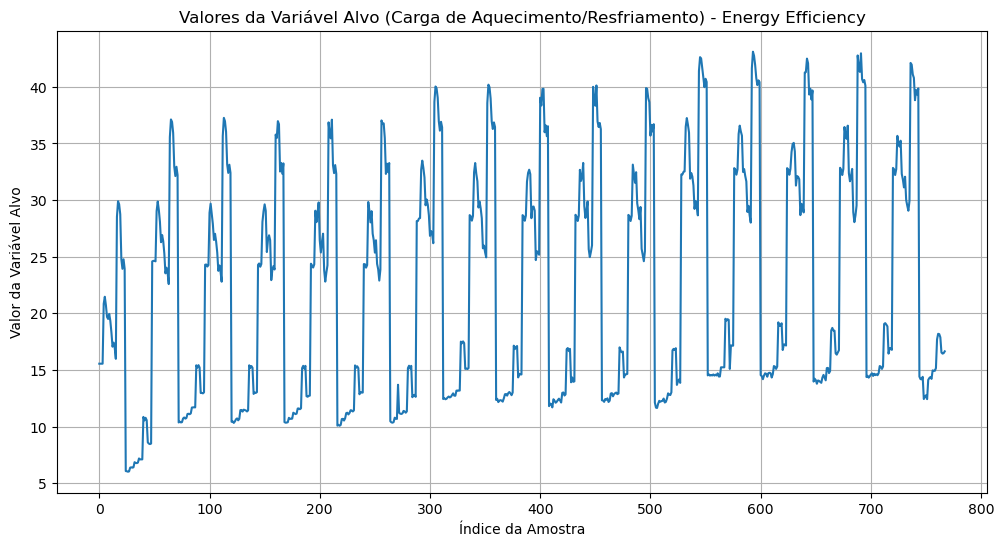

Gráfico 'energy_efficiency_target_distribution.png' gerado.


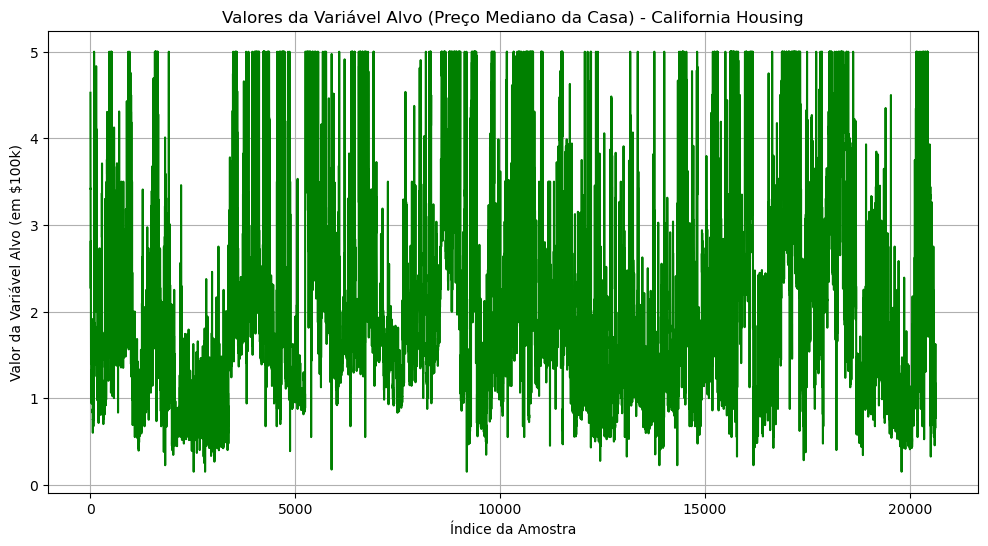

Gráfico 'housing_target_distribution.png' gerado.


In [4]:
# --- NOVO BLOCO: Visualização da Variável Alvo ---

# Gráfico para o dataset Energy Efficiency
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(y_energy)), y=y_energy)
plt.title('Valores da Variável Alvo (Carga de Aquecimento/Resfriamento) - Energy Efficiency')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valor da Variável Alvo')
plt.grid(True)
plt.savefig('energy_efficiency_target_distribution.png')
plt.show()
print("Gráfico 'energy_efficiency_target_distribution.png' gerado.")


# Gráfico para o dataset California Housing
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(y_housing)), y=y_housing, color='green')
plt.title('Valores da Variável Alvo (Preço Mediano da Casa) - California Housing')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valor da Variável Alvo (em $100k)')
plt.grid(True)
plt.savefig('housing_target_distribution.png')
plt.show()
print("Gráfico 'housing_target_distribution.png' gerado.")

# --- FIM DO NOVO BLOCO ---

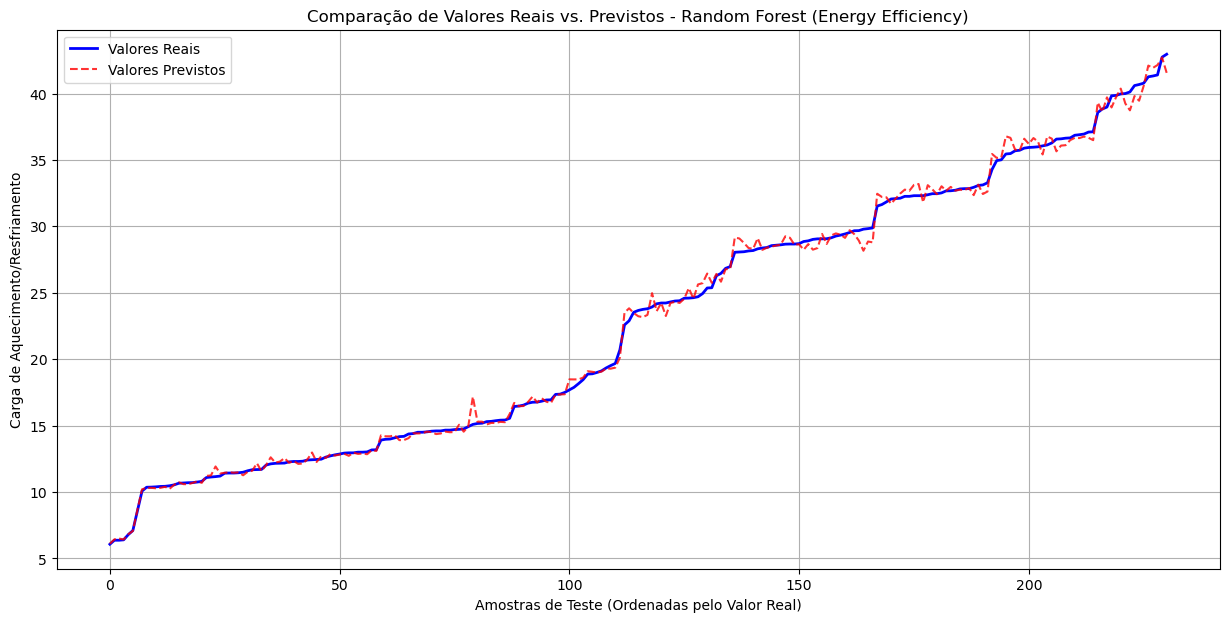

Gráfico 'energy_efficiency_real_vs_predicted_line.png' gerado.


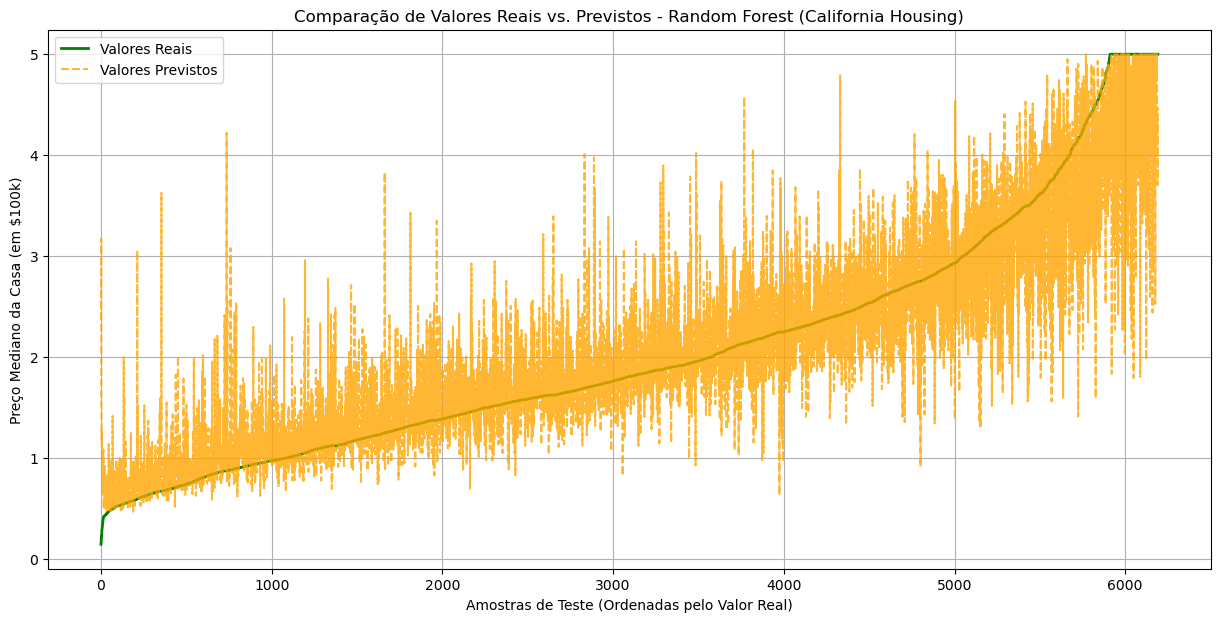

Gráfico 'housing_real_vs_predicted_line.png' gerado.


In [10]:
# --- NOVO BLOCO: Gráfico de Linha Reais vs. Previstos ---

# --- Para o dataset Energy Efficiency ---

# Identificar o melhor modelo e suas previsões
best_model_name_en = min(results_energy, key=lambda k: results_energy[k][0])
y_pred_best_en = predictions_energy[best_model_name_en]

# Criar um DataFrame para ordenar os valores
df_en = pd.DataFrame({'Real': y_test_en, 'Previsto': y_pred_best_en}).sort_values(by='Real').reset_index(drop=True)

# Plotar os dados ordenados
plt.figure(figsize=(15, 7))
plt.plot(df_en['Real'], label='Valores Reais', color='blue', linewidth=2)
plt.plot(df_en['Previsto'], label='Valores Previstos', color='red', linestyle='--', alpha=0.8)
plt.title(f'Comparação de Valores Reais vs. Previstos - {best_model_name_en} (Energy Efficiency)')
plt.xlabel('Amostras de Teste (Ordenadas pelo Valor Real)')
plt.ylabel('Carga de Aquecimento/Resfriamento')
plt.legend()
plt.grid(True)
plt.savefig('energy_efficiency_real_vs_predicted_line.png')
plt.show()
print("Gráfico 'energy_efficiency_real_vs_predicted_line.png' gerado.")


# --- Para o dataset California Housing ---

# Identificar o melhor modelo e suas previsões
best_model_name_hs = min(results_housing, key=lambda k: results_housing[k][0])
y_pred_best_hs = predictions_housing[best_model_name_hs]

# Criar um DataFrame para ordenar os valores
df_hs = pd.DataFrame({'Real': y_test_hs, 'Previsto': y_pred_best_hs}).sort_values(by='Real').reset_index(drop=True)

# Plotar os dados ordenados
plt.figure(figsize=(15, 7))
plt.plot(df_hs['Real'], label='Valores Reais', color='green', linewidth=2)
plt.plot(df_hs['Previsto'], label='Valores Previstos', color='orange', linestyle='--', alpha=0.8)
plt.title(f'Comparação de Valores Reais vs. Previstos - {best_model_name_hs} (California Housing)')
plt.xlabel('Amostras de Teste (Ordenadas pelo Valor Real)')
plt.ylabel('Preço Mediano da Casa (em $100k)')
plt.legend()
plt.grid(True)
plt.savefig('housing_real_vs_predicted_line.png')
plt.show()
print("Gráfico 'housing_real_vs_predicted_line.png' gerado.")

# --- FIM DO NOVO BLOCO ---



Iniciando análises de diagnóstico para o melhor modelo (Random Forest) no dataset California Housing...

Gráfico 'housing_residuals_plot.png' gerado.
Gráfico 'housing_feature_importance.png' gerado.


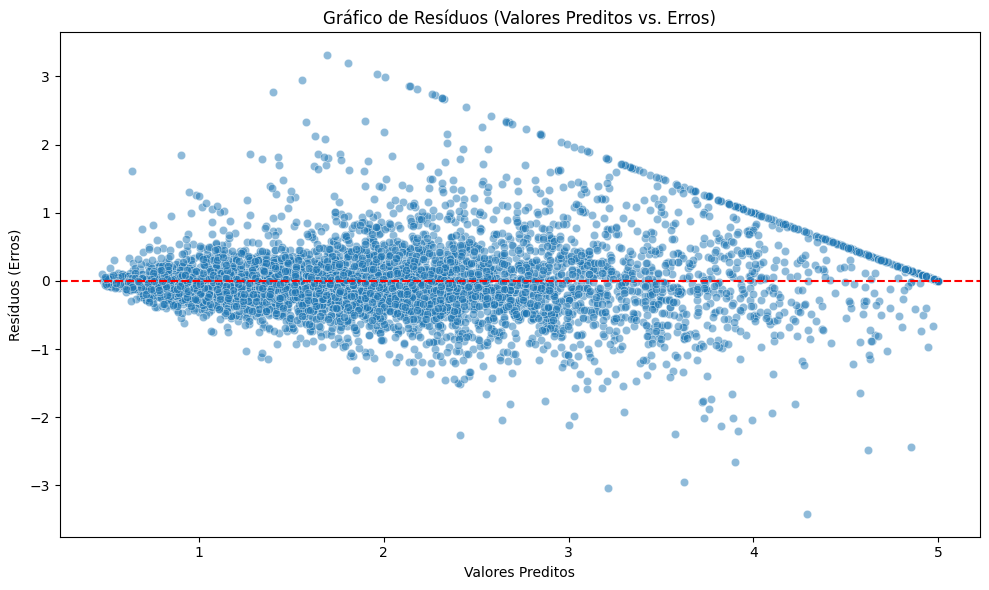

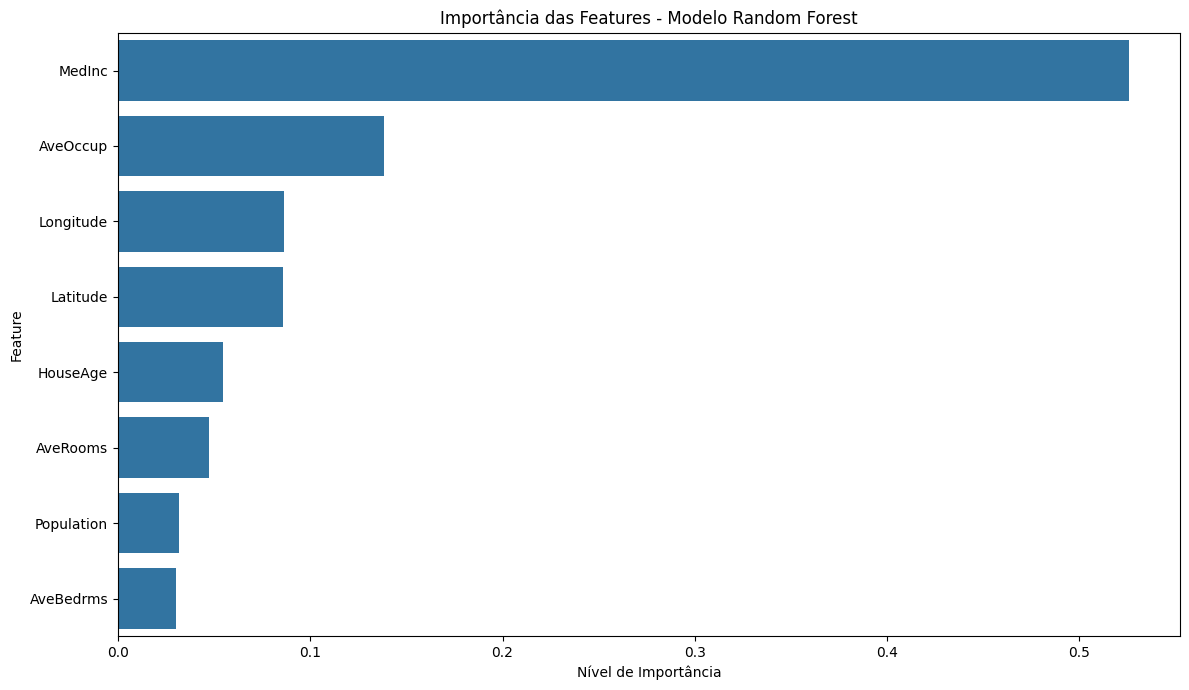

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# --- Análise de Diagnóstico e Interpretabilidade para o Melhor Modelo (Random Forest) ---

print("\n\nIniciando análises de diagnóstico para o melhor modelo (Random Forest) no dataset California Housing...")

# Treinando uma única instância do melhor modelo para obter os dados para os gráficos
best_model_hs = RandomForestRegressor(n_estimators=100, random_state=42)
best_model_hs.fit(X_train_hs, y_train_hs)
y_pred_best_hs = best_model_hs.predict(X_test_hs)


# --- Gráfico 7: Análise de Resíduos ---
# Os resíduos são a diferença entre o valor real e o valor predito
residuals = y_test_hs - y_pred_best_hs

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best_hs, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Linha em y=0 para referência
plt.title('Gráfico de Resíduos (Valores Preditos vs. Erros)')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos (Erros)')
plt.tight_layout()
plt.savefig('housing_residuals_plot.png')
print("\nGráfico 'housing_residuals_plot.png' gerado.")


# --- Gráfico 8: Importância das Features ---
feature_importances = best_model_hs.feature_importances_
features_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importância das Features - Modelo Random Forest')
plt.xlabel('Nível de Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('housing_feature_importance.png')
print("Gráfico 'housing_feature_importance.png' gerado.")



Iniciando análises de diagnóstico para o melhor modelo no dataset Energy Efficiency...
O melhor modelo para Energy Efficiency foi: Random Forest

Gráfico 'energy_efficiency_residuals_plot.png' gerado.
Gráfico 'energy_efficiency_feature_importance.png' gerado.


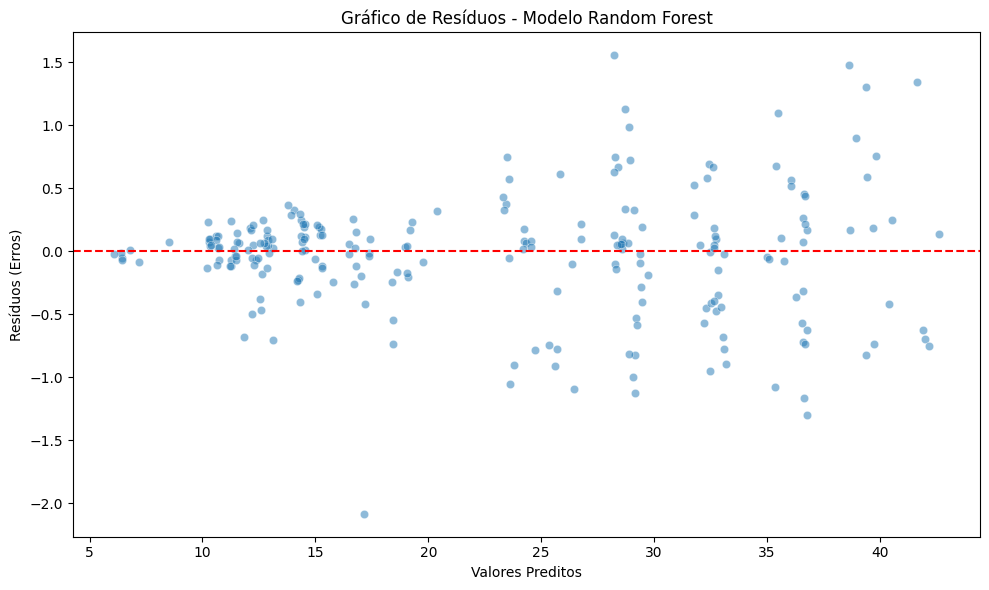

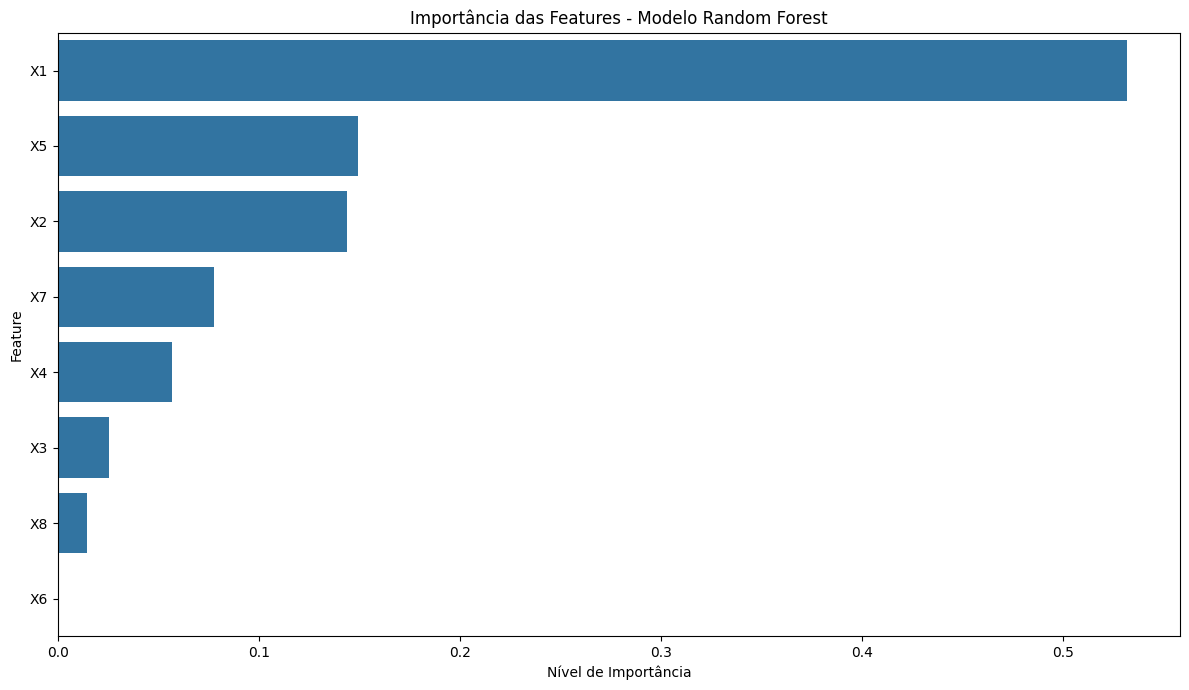

In [15]:
# --- Análise de Diagnóstico e Interpretabilidade para o Melhor Modelo (Energy Efficiency) ---

print("\n\nIniciando análises de diagnóstico para o melhor modelo no dataset Energy Efficiency...")

# Dicionário para recriar o modelo (necessário caso esta célula seja executada de forma isolada)
algorithms_map = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Identificar o nome do melhor modelo a partir dos resultados já calculados
best_model_name_en = min(results_energy, key=lambda k: results_energy[k][0])
print(f"O melhor modelo para Energy Efficiency foi: {best_model_name_en}")

# Treinar uma única instância do melhor modelo para obter os dados para os gráficos
best_model_en = algorithms_map[best_model_name_en]
best_model_en.fit(X_train_en, y_train_en)
y_pred_best_en = best_model_en.predict(X_test_en)


# --- Gráfico de Resíduos ---
residuals_en = y_test_en - y_pred_best_en

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best_en, y=residuals_en, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Linha em y=0 para referência
plt.title(f'Gráfico de Resíduos - Modelo {best_model_name_en}')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos (Erros)')
plt.tight_layout()
plt.savefig('energy_efficiency_residuals_plot.png')
print("\nGráfico 'energy_efficiency_residuals_plot.png' gerado.")


# --- Gráfico de Importância das Features ---
# Esta visualização só funciona para modelos baseados em árvores, como o Random Forest.
if isinstance(best_model_en, RandomForestRegressor):
    feature_importances_en = best_model_en.feature_importances_
    features_df_en = pd.DataFrame({
        'Feature': X_energy.columns, # Usando as colunas do dataframe original
        'Importance': feature_importances_en
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Importance', y='Feature', data=features_df_en)
    plt.title(f'Importância das Features - Modelo {best_model_name_en}')
    plt.xlabel('Nível de Importância')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('energy_efficiency_feature_importance.png')
    print("Gráfico 'energy_efficiency_feature_importance.png' gerado.")
else:
    print(f"\nO modelo '{best_model_name_en}' não suporta a análise de importância de features de forma direta.")

Carregando Energy Efficiency Dataset...
Dataset Energy Efficiency carregado com sucesso!

Carregando California Housing Dataset...
Dataset California Housing carregado com sucesso!

Iniciando experimento com Energy Efficiency Dataset...

Gráfico 'energy_efficiency_all_models_scatter.png' com todos os modelos foi gerado.


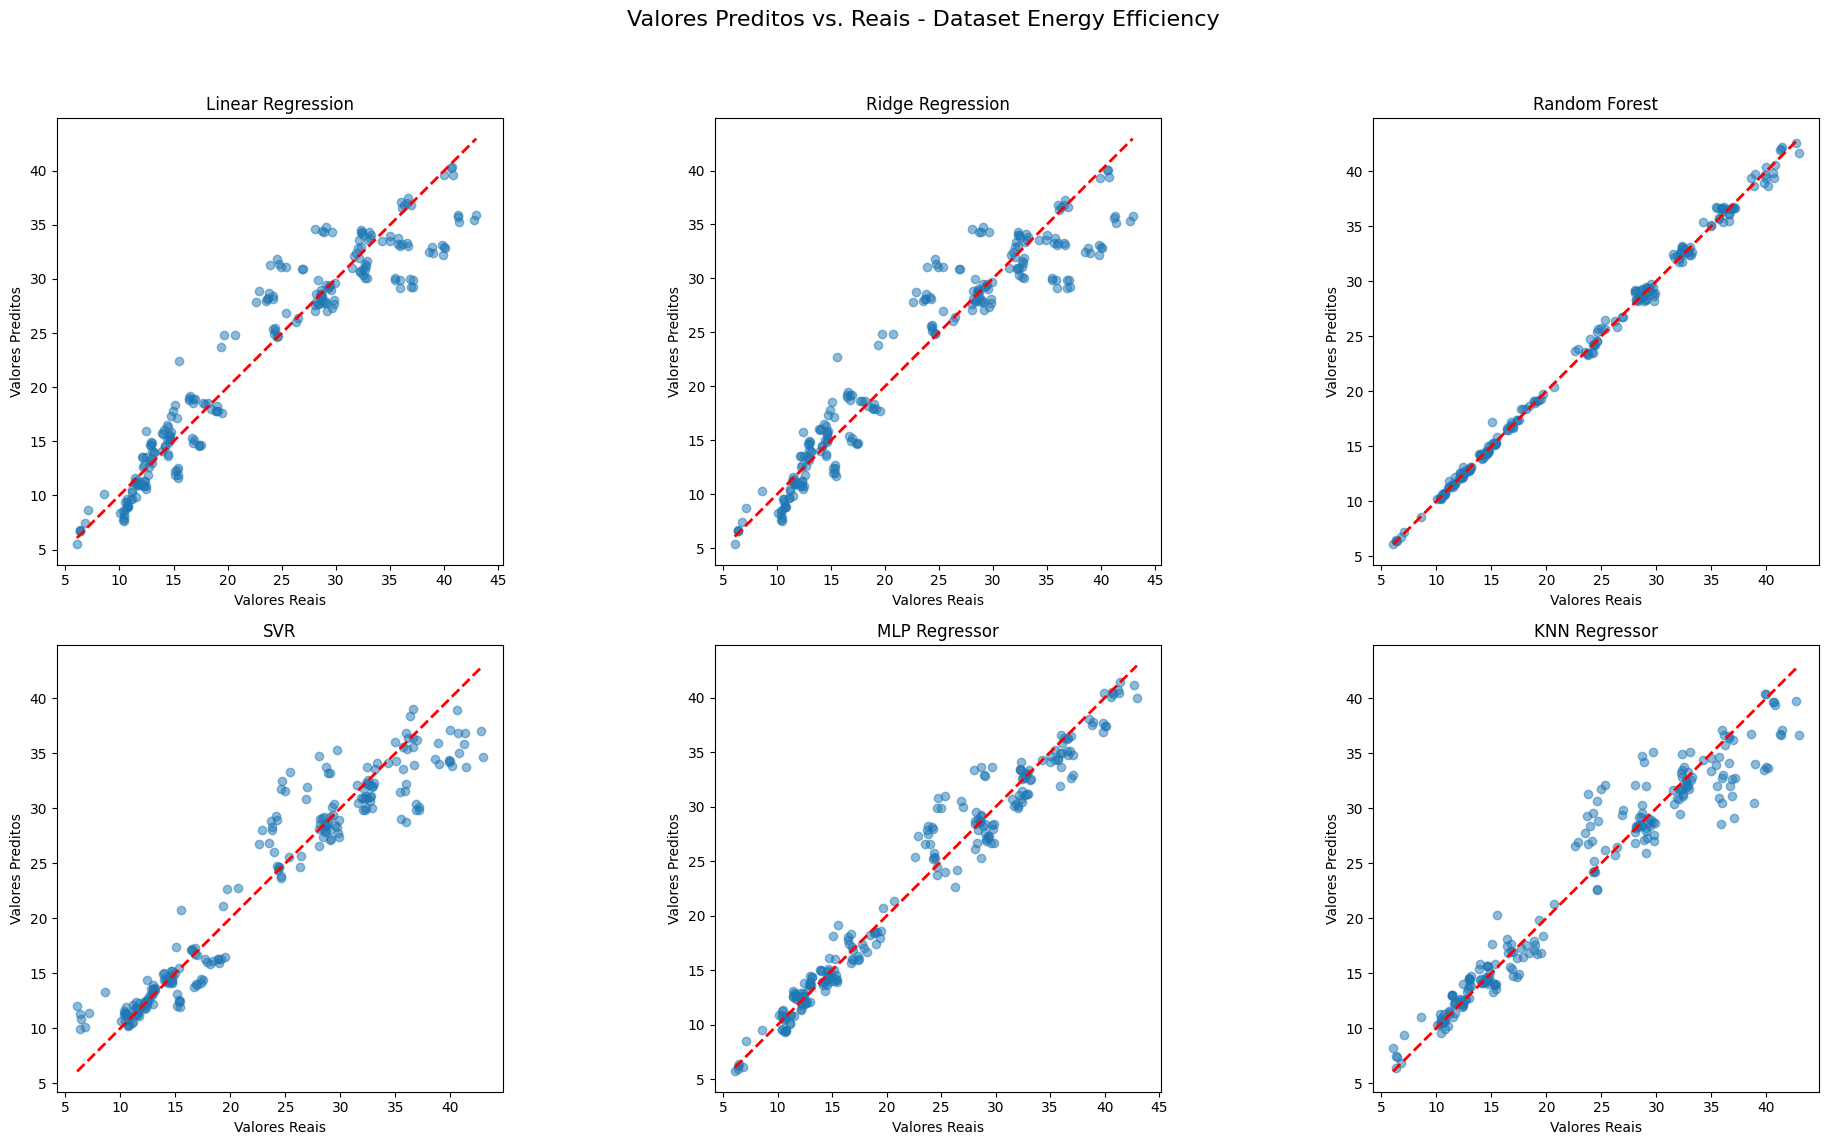



Iniciando experimento com California Housing Dataset...

Gráfico 'housing_all_models_scatter.png' com todos os modelos foi gerado.


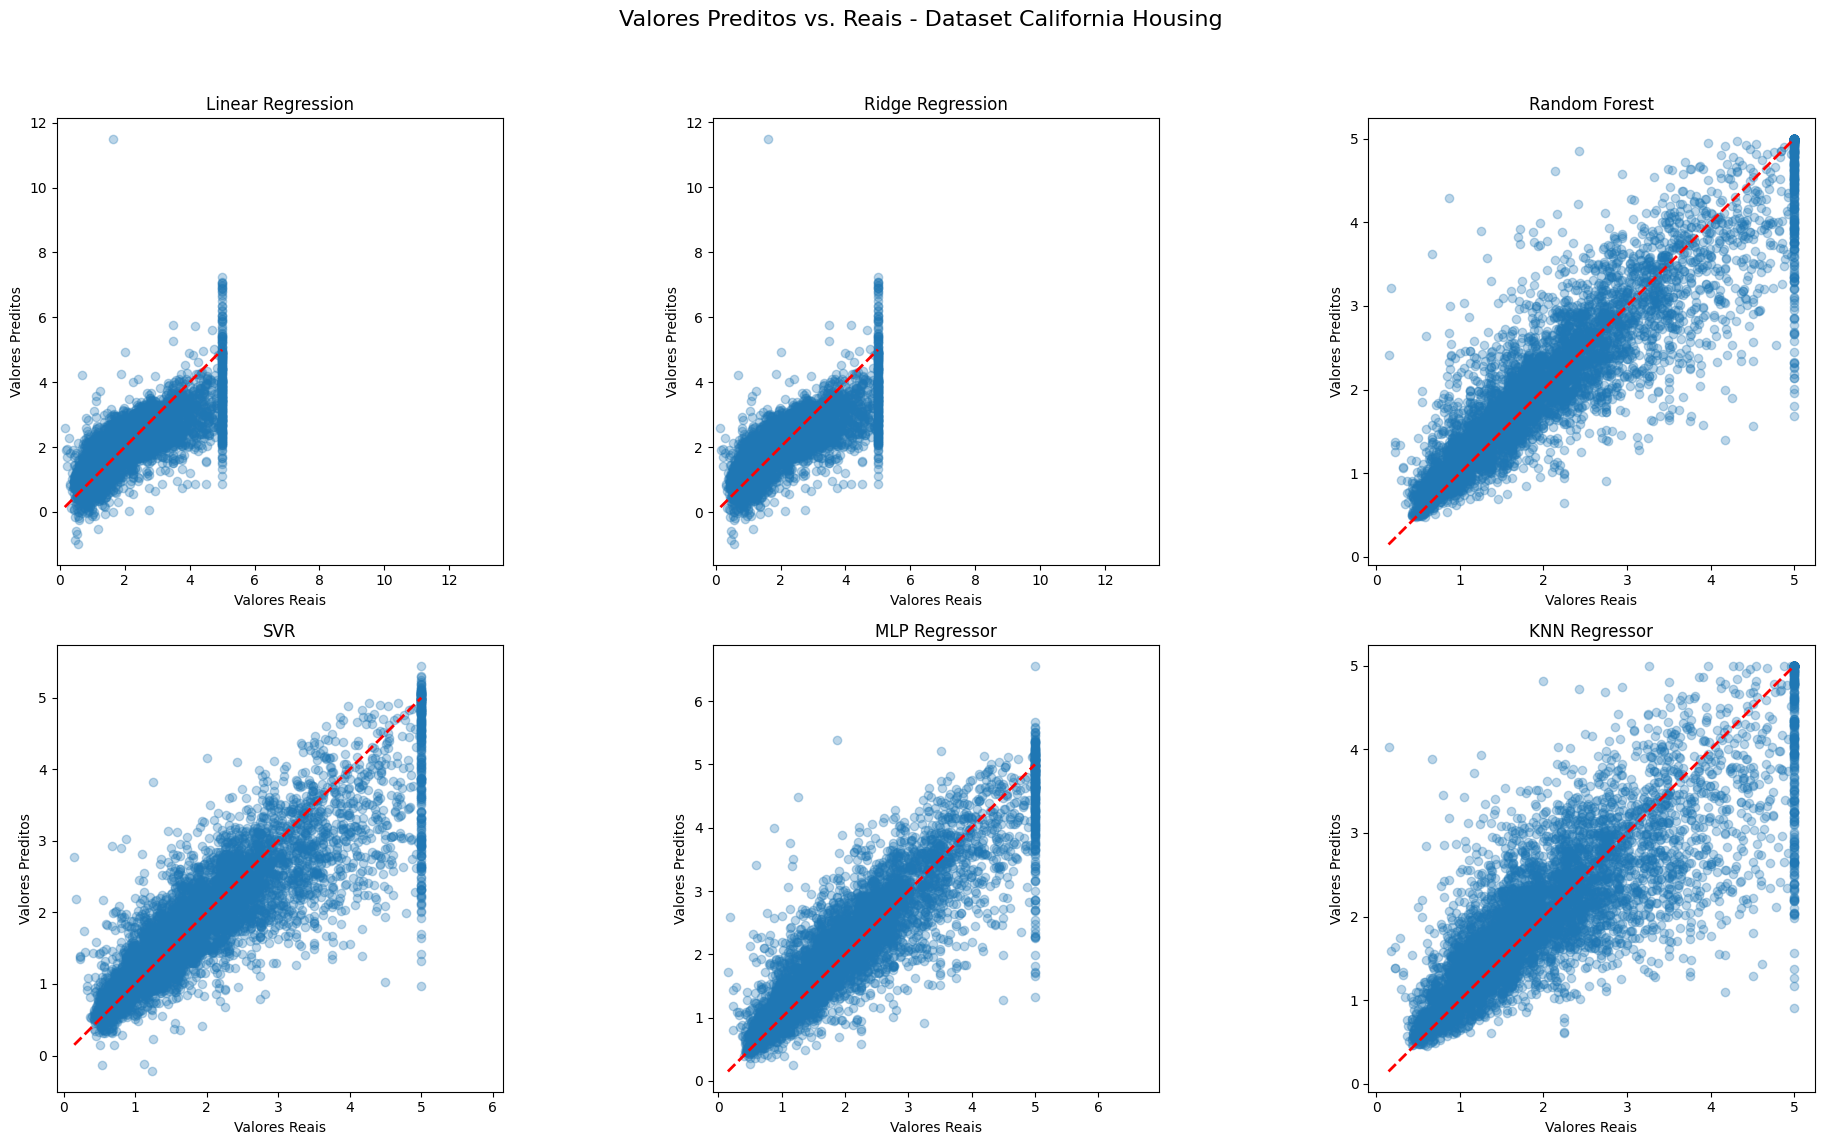

In [16]:
# --- Carregamento dos Datasets ---

# Dataset Obrigatório: Energy Efficiency
print("Carregando Energy Efficiency Dataset...")
energy_efficiency = fetch_ucirepo(id=242)
X_energy = energy_efficiency.data.features
y_energy = energy_efficiency.data.targets['Y1']
print("Dataset Energy Efficiency carregado com sucesso!")

# Dataset de Livre Escolha: California Housing
print("\nCarregando California Housing Dataset...")
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = pd.Series(housing.target)
print("Dataset California Housing carregado com sucesso!")


# --- Definição dos Algoritmos ---
algorithms = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42), # Fixando a semente para o gráfico
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42), # Fixando a semente
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
}


# --- Experimento 1: Energy Efficiency Dataset ---
print("\nIniciando experimento com Energy Efficiency Dataset...")
scaler_en = StandardScaler()
X_energy_scaled = scaler_en.fit_transform(X_energy)
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(
    X_energy_scaled, y_energy, test_size=0.3, random_state=42
)

# Preparar figura para os gráficos de Predito vs Real
fig_en, axes_en = plt.subplots(2, 3, figsize=(20, 12))
fig_en.suptitle('Valores Preditos vs. Reais - Dataset Energy Efficiency', fontsize=16)
axes_en = axes_en.flatten() # Transforma a matriz 2x3 de eixos em um array de 6

for i, (name, model) in enumerate(algorithms.items()):
    model.fit(X_train_en, y_train_en)
    y_pred = model.predict(X_test_en)
    
    # Plotar no subplot correspondente
    ax = axes_en[i]
    ax.scatter(y_test_en, y_pred, alpha=0.5)
    ax.plot([y_test_en.min(), y_test_en.max()], [y_test_en.min(), y_test_en.max()], '--r', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Valores Reais')
    ax.set_ylabel('Valores Preditos')
    ax.axis('equal')
    ax.axis('square')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('energy_efficiency_all_models_scatter.png')
print("\nGráfico 'energy_efficiency_all_models_scatter.png' com todos os modelos foi gerado.")
plt.show()


# --- Experimento 2: California Housing Dataset ---
print("\n\nIniciando experimento com California Housing Dataset...")
scaler_hs = StandardScaler()
X_housing_scaled = scaler_hs.fit_transform(X_housing)
X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(
    X_housing_scaled, y_housing, test_size=0.3, random_state=42
)

# Preparar figura para os gráficos de Predito vs Real
fig_hs, axes_hs = plt.subplots(2, 3, figsize=(20, 12))
fig_hs.suptitle('Valores Preditos vs. Reais - Dataset California Housing', fontsize=16)
axes_hs = axes_hs.flatten() # Transforma a matriz 2x3 de eixos em um array de 6

for i, (name, model) in enumerate(algorithms.items()):
    model.fit(X_train_hs, y_train_hs)
    y_pred = model.predict(X_test_hs)

    # Plotar no subplot correspondente
    ax = axes_hs[i]
    ax.scatter(y_test_hs, y_pred, alpha=0.3)
    ax.plot([y_test_hs.min(), y_test_hs.max()], [y_test_hs.min(), y_test_hs.max()], '--r', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Valores Reais')
    ax.set_ylabel('Valores Preditos')
    ax.axis('equal')
    ax.axis('square')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('housing_all_models_scatter.png')
print("\nGráfico 'housing_all_models_scatter.png' com todos os modelos foi gerado.")
plt.show()

In [12]:
import pandas as pd

# Defina os nomes dos arquivos de entrada (CSV) e saída (XLSX)
arquivo_csv = 'housing.csv'  # Substitua pelo nome do seu arquivo CSV
arquivo_xlsx = 'price_house.xlsx' # Nome do arquivo Excel que será criado




# 1. Ler o arquivo CSV para um DataFrame do pandas
try:
    df = pd.read_csv(arquivo_csv)
    
    # 2. Escrever o DataFrame para um arquivo Excel (.xlsx)
    #    O parâmetro `index=False` evita que o índice do DataFrame seja escrito no Excel
    df.to_excel(arquivo_xlsx, index=False, sheet_name='Dados')
    
    print(f"\nConversão concluída com sucesso! O arquivo '{arquivo_xlsx}' foi criado.")

except FileNotFoundError:
    print(f"\nErro: O arquivo '{arquivo_csv}' não foi encontrado. Verifique o nome e o caminho do arquivo.")


Conversão concluída com sucesso! O arquivo 'price_house.xlsx' foi criado.
